<a href="https://colab.research.google.com/github/CarlosRochaCx/MNA/blob/main/Actividad5Preprocesamiento_A01796914.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Carlos Alberto Rocha Chávez
*   MATRÍCULA: A01796914

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA - Maestría en Inteligencia Artificial Aplicada/Ciencia y Analítica de Datos/Actividad 5 - Preprocesamiento"
os.chdir(DIR)

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [70]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [71]:
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


Al usar la función `info()` podemos ver que nuestra base de datos cuenta con 139 variables numéricas y 11 variables de texto.

In [72]:
response_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Music,1007.0,4.731877,0.664049,1.0,5.0,5.0,5.0,5.0
Slow songs or fast songs,1008.0,3.328373,0.833931,1.0,3.0,3.0,4.0,5.0
Dance,1006.0,3.113320,1.170568,1.0,2.0,3.0,4.0,5.0
Folk,1005.0,2.288557,1.138916,1.0,1.0,2.0,3.0,5.0
Country,1005.0,2.123383,1.076136,1.0,1.0,2.0,3.0,5.0
...,...,...,...,...,...,...,...,...
Spending on healthy eating,1008.0,3.557540,1.093750,1.0,3.0,4.0,4.0,5.0
Age,1003.0,20.433699,2.828840,15.0,19.0,20.0,22.0,30.0
Height,990.0,173.514141,10.024505,62.0,167.0,173.0,180.0,203.0
Weight,990.0,66.405051,13.839561,41.0,55.0,64.0,75.0,165.0


In [73]:
response_df.describe(include='object').T

,count,unique,top,freq
Smoking,1002,4,tried smoking,430
Alcohol,1005,3,social drinker,659
Punctuality,1008,3,i am always on time,399
Lying,1008,4,sometimes,549
Internet usage,1010,4,few hours a day,744
Gender,1004,2,female,593
Left - right handed,1007,2,right handed,906
Education,1009,6,secondary school,621
Only child,1008,2,no,754
Village - town,1006,2,city,707


2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


In [74]:
response_df['Weight'].value_counts()

,count
Weight,
60.0,76
55.0,62
70.0,51
80.0,50
65.0,49
...,...
111.0,1
41.0,1
103.0,1


<Axes: >

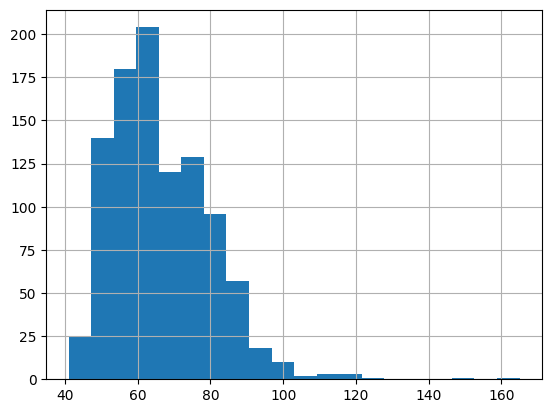

In [75]:
response_df['Weight'].hist(bins = 20)

En este histograma se puede observar la distribución de los valores de la variable `Weight`. El uso del histograma, en lugar de una gráfica de barras, se debe a que la variable `Weight` posee datos cuantitativos continuos, los cuales son mejor representados con este gráfico.

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [76]:
response_df['Weight'].skew()

1.2237251927527477

Al observar el histograma, y validarlo con la función `skew()`, podemos confirmar que la variable `Weight` es asimétrica positiva al devolver un valor mayor a 1. Esto se puede confirmar visualmente en el histograma, al ver como la "cola" de los datos tiene la tendencia a la derecha.

4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [77]:
response_df['Weight'].isna().sum()

20

In [78]:
response_df['Weight'].isna().sum()/len(response_df['Weight'])*100

1.9801980198019802

Con los cálculos previamente realizados, podemos ver que la variable `Weight` tiene 20 valores faltantes, lo cuál representa el 1.98% de todos nuestros datos.

5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas. NO olvides incluir las conclusiones del análisis con los resultados obtenidos.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [79]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [80]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

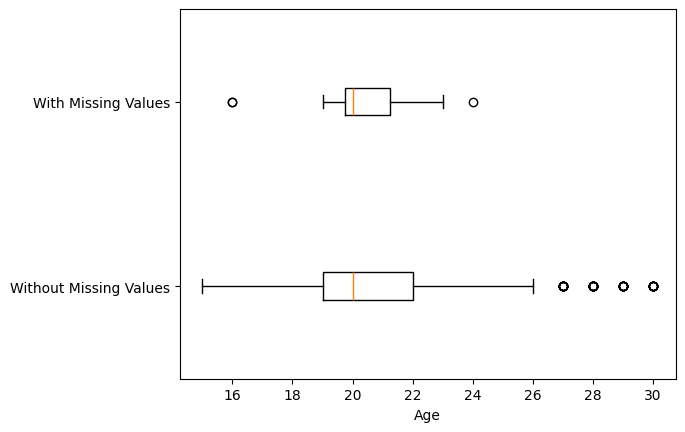

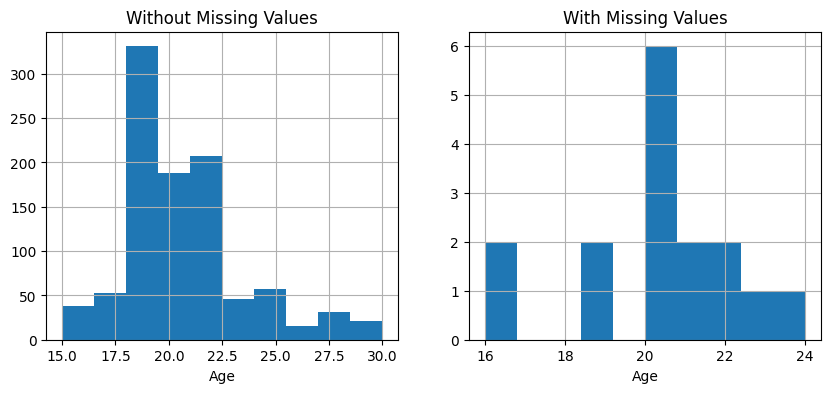

p-value of t-test: 0.7258243979822129


In [81]:
BM_MV = response_df['Weight'].isna()
Diagnose_MV_Numerical(response_df,'Age',BM_MV)

Al analizar la relación que existe entre la variable `Weight` y la variable `Age` en relación a los valores faltantes, podemos encontrar que la mayoría de ellos pertenecen al grupo de edad de 20 a 24 años. Esto es claro en el boxplot, donde se muestra un valor más compacto de edades y una media mayor al grupo que si cuenta con valores de peso. Esto es aún más evidente en el histograma, donde se ve que los valores faltantes son mayormente de aquellos en el rango de edades de 20 a 24.

Esto podría indicar que las personas en un rango de edades de 20 a 24 años tienen mayor probabilidad de **no** contestar preguntas relacionadas con su peso.

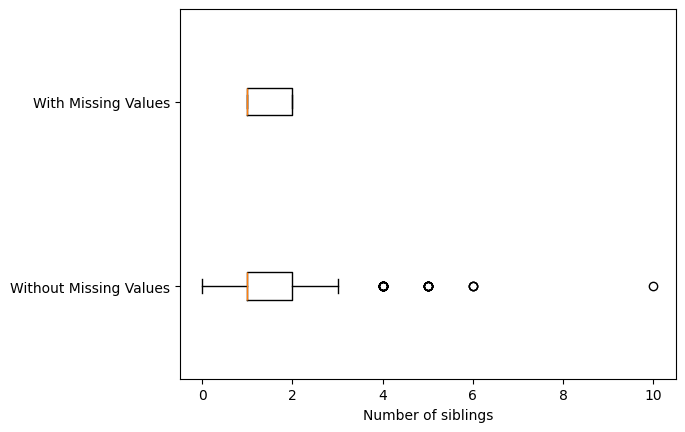

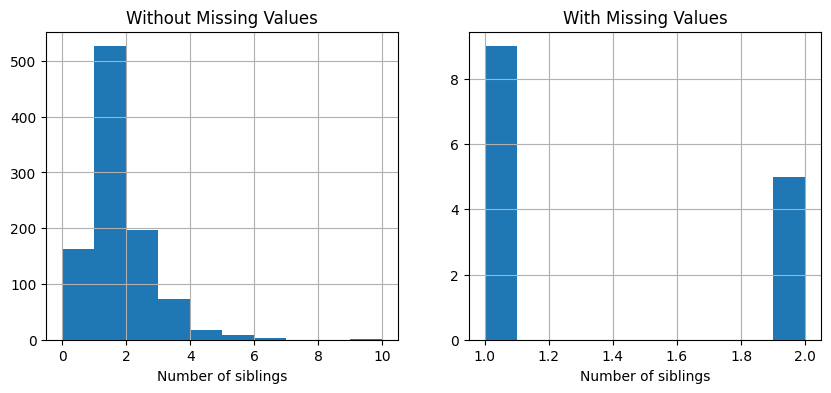

p-value of t-test: 0.8255092107556896


In [82]:
Diagnose_MV_Numerical(response_df,'Number of siblings',BM_MV)

Analizando la relación que existe entre `Weight` y `Number of siblings`, se observa que los valores faltantes solamente provienen de personas que cuentan con uno o dos hermanos. Esto podría indicar que aquellas personas que provienen de familias pequeñas, con uno o dos hermanos, tienden a no responder preguntas relacionados con su peso.

Por otro lado, al analizar el boxplot podemos ver que la media y el rango intercuartil entre aquellos que no respondieron esa pregunta, y aquellos que si lo hicieron, es similar.

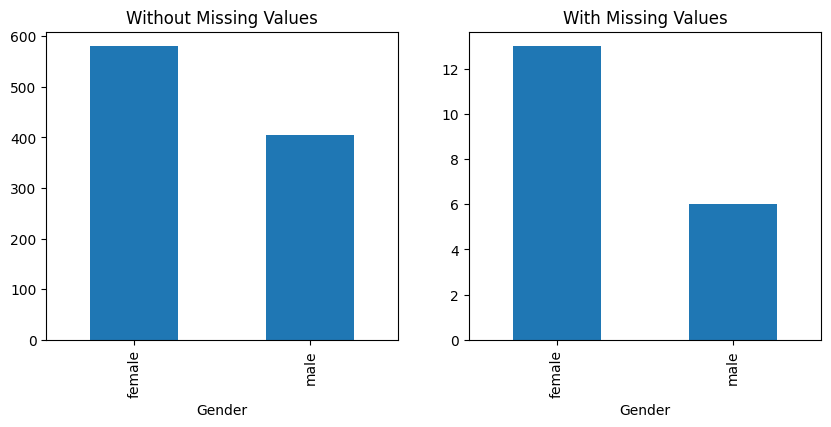

p-value of Chi_squared test: 0.5472167199163878


In [83]:
Diagnose_MV_Categorical(response_df,'Gender',BM_MV)

Al comparar la relación entre la variable `Weight` y `Gender` se logra observar que la cantidad de mujeres que no respondieron la pregunta sobre su peso es mayor a los hombres que no respondieron la pregunta. Esto podría indicar que las mujeres tienden a no responder preguntas relacionadas con su peso en mayor medida que los hombres.

Por otro lado, al comparar la información con aquellas personas que si compartieron su peso en la encuesta, vemos que la mayoría de los encuestados fueron mujeres.

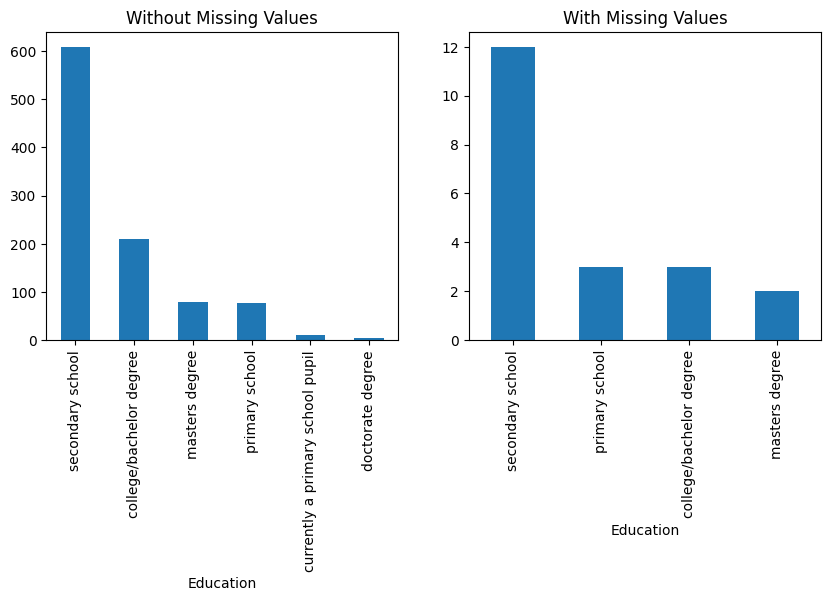

p-value of Chi_squared test: 0.8424822989541867


In [84]:
Diagnose_MV_Categorical(response_df,'Education',BM_MV)

Finalmente, al comparar la variable `Weight` con la variable `Education` podemos visualizar que la mayoría de los encuestados tiene una educación de nivel secundario, seguidos por aquellos que tienen un nivel de educación a nivel universitario. En cuanto a los encuestados que no contestaron la pregunta sobre su peso, se muestra una tendencia similar donde la mayoría son quienes completaron una educación de nivel secundario.


6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

Como pudimos analizar en el histograma, así como con la función `skew()`, sabemos que los datos de la variable `Weight` son asimétricas con un sesgo a la derecha. Por lo tanto, al no tener una distribución normal y poseer un sesgo, utilizaremos la mediana como medida de tendencia central para los valores faltantes.

In [85]:
response_df['Weight'] = response_df['Weight'].fillna(value=response_df['Weight'].median())
response_df['Weight'].isna().sum()

0

7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

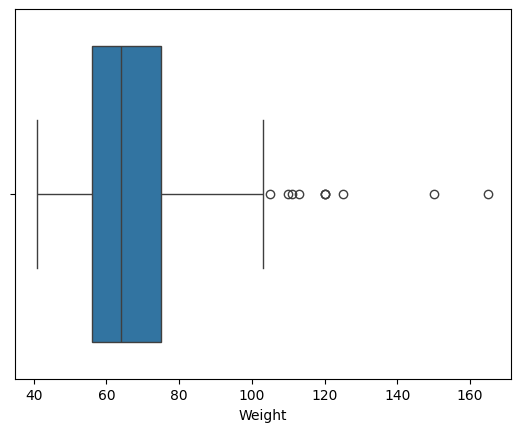

In [86]:
sns.boxplot(x=response_df['Weight'])
plt.show()

El analizar la variable `Weight` en un gráfico de boxplot podemos identificar visualemente que si existen diversos valores atípicos.

In [87]:
Q1 = response_df['Weight'].quantile(0.25)
Q3 = response_df['Weight'].quantile(0.75)
IQR = Q3 - Q1

BM = (response_df.Weight > (Q3+1.5 *IQR)) | (response_df.Weight < (Q1-1.5 *IQR))
Weight_Outliers = response_df[BM]['Weight']
Weight_Outliers

,Weight
292,120.0
612,110.0
715,111.0
793,120.0
796,113.0
859,125.0
885,165.0
973,120.0
992,150.0
998,105.0


In [88]:
print('Existen {} valores atípicos en la variable Weight.'.format(len(Weight_Outliers)))

Existen 10 valores atípicos en la variable Weight.


Una vez que hemos identificado a los 10 valores atípicos de la variable `Weight`, ahora los eliminaremos del dataframe:

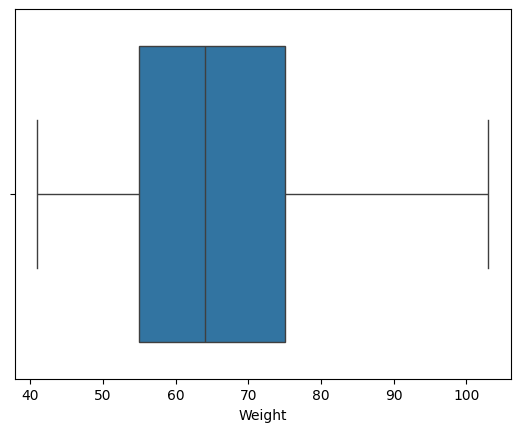

In [89]:
response_df.drop(Weight_Outliers.index, inplace=True)

sns.boxplot(x=response_df['Weight'])
plt.show()

Como se puede observar, ahora el boxplot no muestra ningún valor atípico.

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

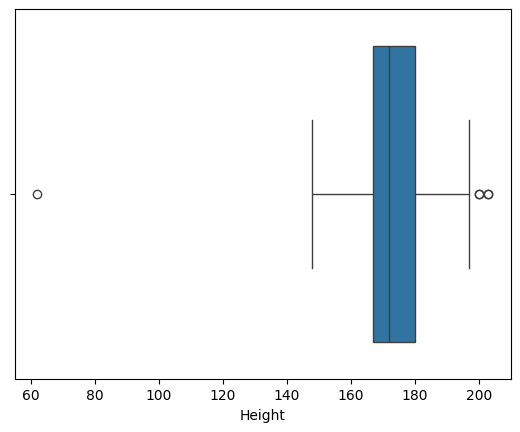

In [90]:
sns.boxplot(x=response_df['Height'])
plt.show()

Al analizar la variable `Height` con un gráfico de boxplot podemos detectar la existencia de pocos valores atípicos.

In [91]:
Q1 = response_df['Height'].quantile(0.25)
Q3 = response_df['Height'].quantile(0.75)
IQR = Q3 - Q1

BM = (response_df.Height > (Q3+1.5 *IQR)) | (response_df.Height < (Q1-1.5 *IQR))
Height_Outliers = response_df[BM]['Height']
Height_Outliers

,Height
97,200.0
220,200.0
547,203.0
676,62.0
799,203.0


In [92]:
print('Existen {} valores atípicos en la variable Height.'.format(len(Height_Outliers)))

Existen 5 valores atípicos en la variable Height.


Podemos ver que existen 5 valores atípicos en la variable `Height`, y tal como se hizo con la variable `Weight`, los eliminaremos del dataframe:

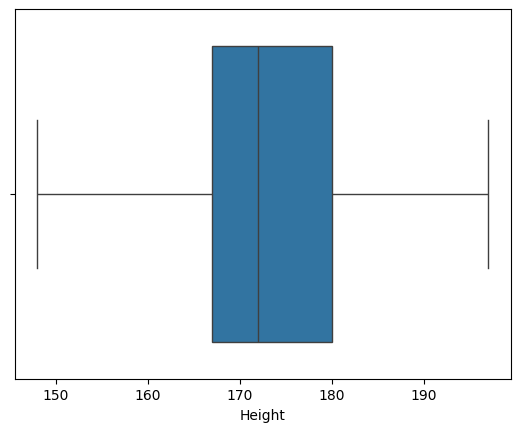

In [93]:
response_df.drop(Height_Outliers.index, inplace=True)

sns.boxplot(x=response_df['Height'])
plt.show()

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

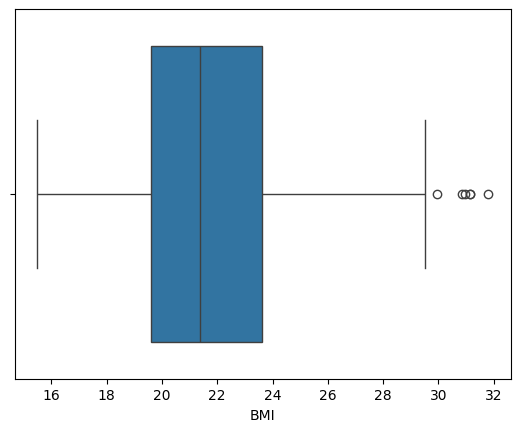

In [94]:
response_df['Height_M'] = response_df['Height']/100
response_df['BMI'] = response_df['Weight']/(response_df['Height_M']**2)
response_df

sns.boxplot(x=response_df['BMI'])
plt.show()

Al reflejar los valores calculados de BMI en un boxplot, podemos identificar visualmetne que si existen valores atípicos en este variable.

In [95]:
Q1 = response_df['BMI'].quantile(0.25)
Q3 = response_df['BMI'].quantile(0.75)
IQR = Q3 - Q1

BM = (response_df.BMI > (Q3+1.5 *IQR)) | (response_df.BMI < (Q1-1.5 *IQR))
BMI_Outliers = response_df[BM]['BMI']
BMI_Outliers

,BMI
42,31.141869
151,30.864198
156,30.961729
357,29.961612
401,31.141869
636,31.804658


In [96]:
print('Existen {} valores atípicos en la variable BMI.'.format(len(BMI_Outliers)))

Existen 6 valores atípicos en la variable BMI.


10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

In [97]:
categorical_columns = response_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage',
       'Gender', 'Left - right handed', 'Education', 'Only child',
       'Village - town', 'House - block of flats'],
      dtype='object')

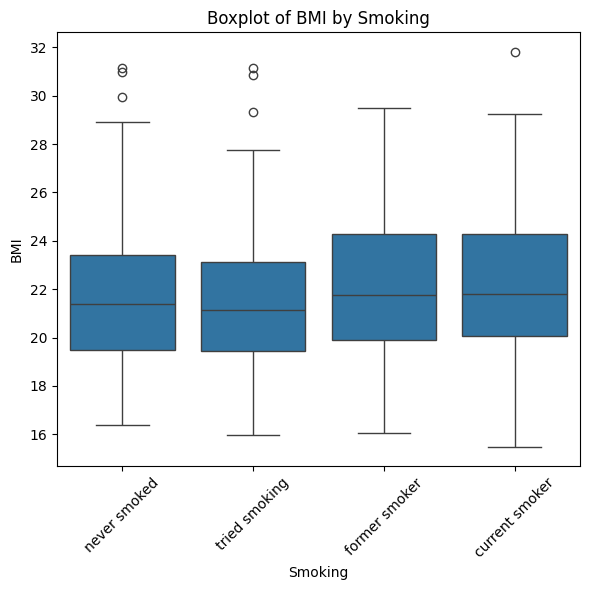

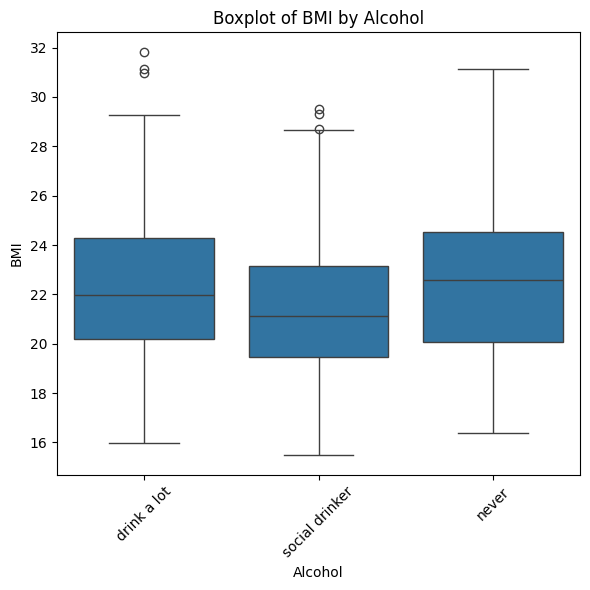

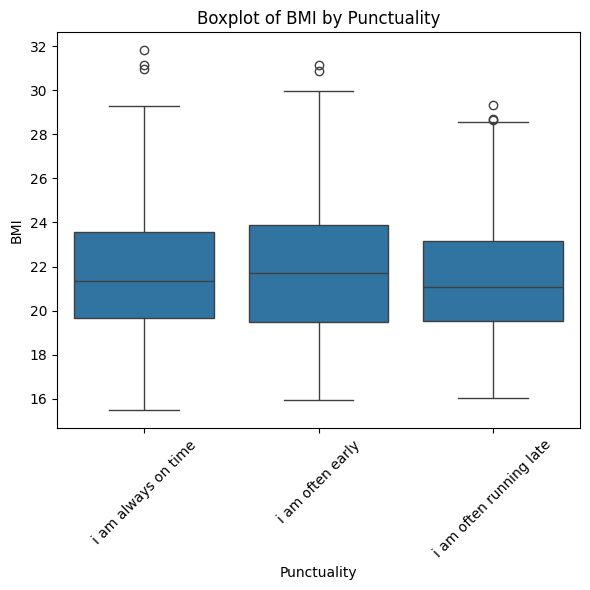

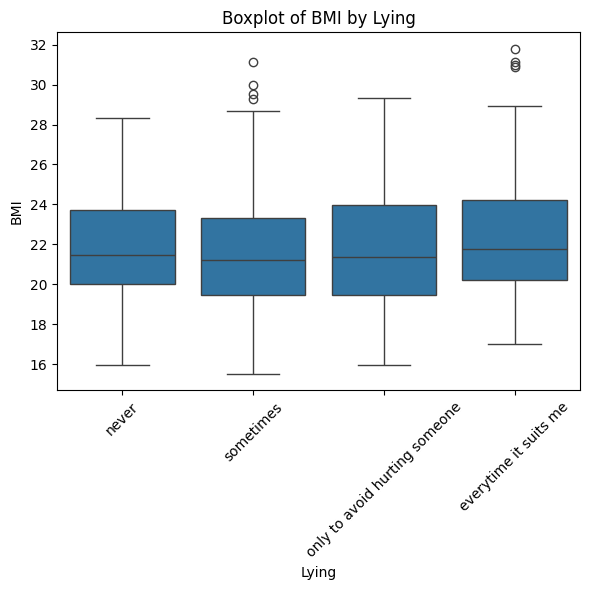

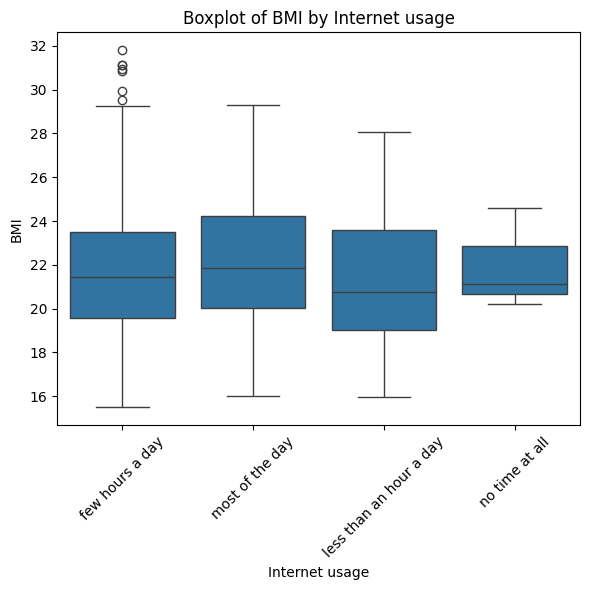

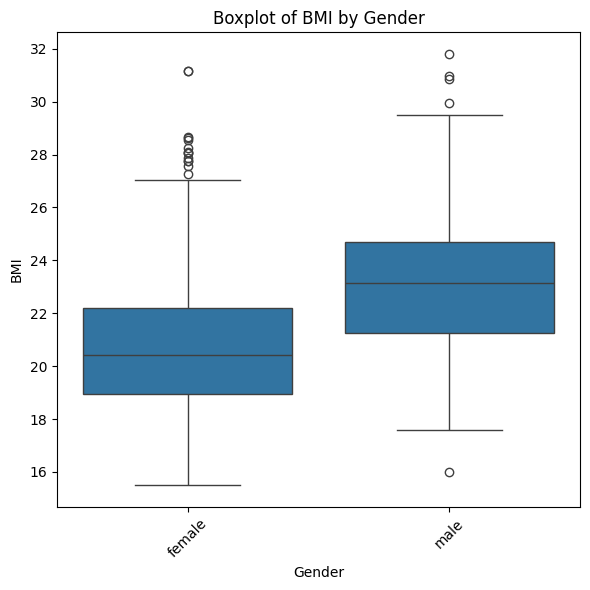

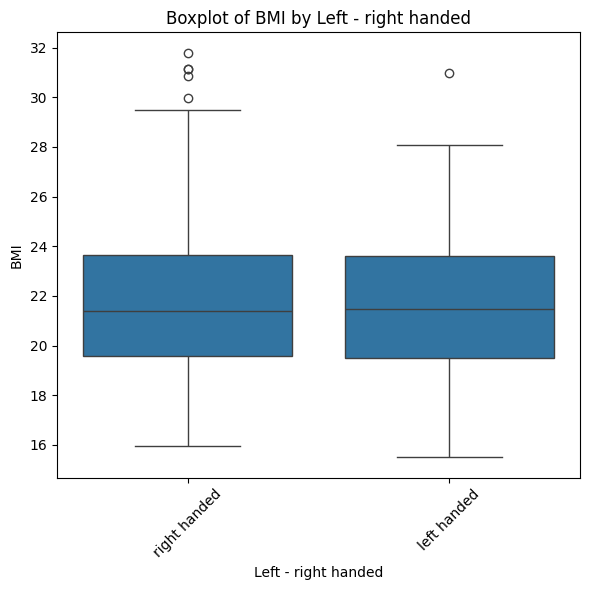

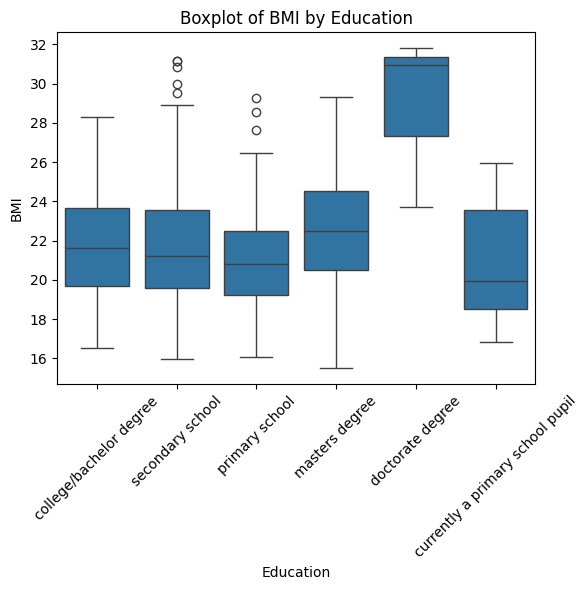

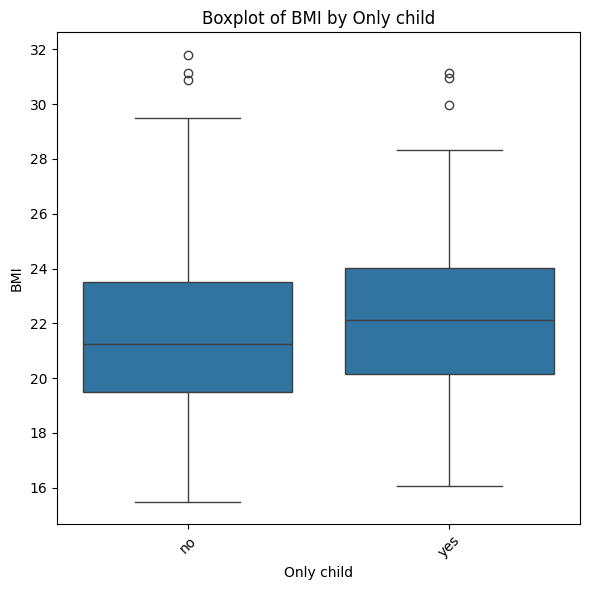

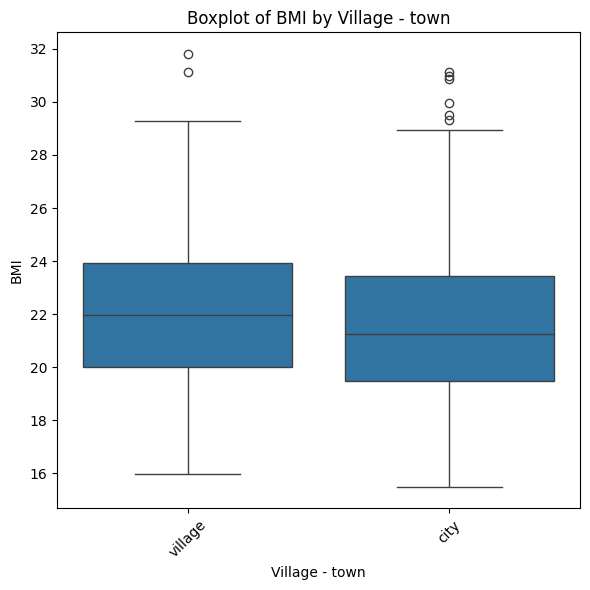

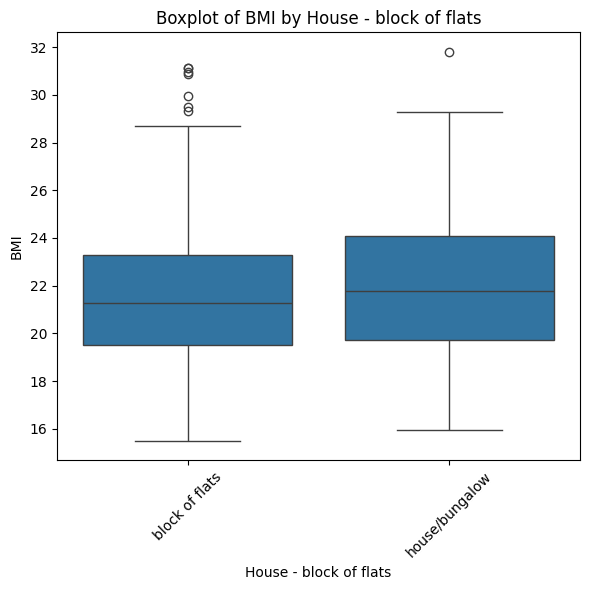

In [66]:
for column in ['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage', 'Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats']:
    plt.figure(figsize=(6,6))
    sns.boxplot(x=column, y='BMI', data=response_df)
    plt.title(f'Boxplot of BMI by {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Se puede identificar una observación importante al comparar el BMI por el nivel de educación. En los gráficos de boxplot creados se logra percibir que las personas encuestadas con un nivel de educación de doctorado cuentan con un BMI significativamente mayor a las personas encuestadas con otros niveles de educación.